In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

'''
Hyper-parameters
'''
HAMPEL_WINDOW_SIZE = 21
HAMPEL_THRESHOLD = 1
HAMPEL_IMPUTATION = True

'''
# data preprocessing step
'''
pd.set_option('display.width', 200) # for display width

# 1. read data config(*.csv) file
'''
read all data read from data configuration file
- note) *.xlsx must be converted to csv format because of the file format doest not support in pandas
'''
data_config = pd.read_csv('./data/train/data_config.csv', header=0, index_col=0)
print("***** data configurations *****")
print("- config data shape : ", data_config.shape)

# 2. read all data logs (FSR matrix, Seat Sensor Data)
fsr_dataframe = {}
seat_dataframe = {}
print(data_config)

for idx in data_config.index:
    fsr_filepath = './data/train/'+data_config.loc[idx, "fsr_matrix_1d_datafile"]
    seat_filepath = './data/train/'+data_config.loc[idx, "seat_datafile"]
    print(idx, ") read data files : ", fsr_filepath, ",", seat_filepath)

    fsr_dataframe[idx] = pd.read_csv(fsr_filepath, header=0, index_col=False).iloc[:,0:162]
    seat_dataframe[idx] = pd.read_csv(seat_filepath, header=0, index_col=False)

    # clear unnecessary columns
    del seat_dataframe[idx]['Measurement time']
    del fsr_dataframe[idx]['Measurement Time (sec)']


***** data configurations *****
- config data shape :  (19, 12)
    user_height  user_weight  user_age  user_gender  bestfit_angle_standard  bestfit_angle_relax         standard_s_mtime         standard_e_mtime            relax_s_mtime            relax_e_mtime  \
id                                                                                                                                                                                                     
1           176           64        39            1                    1036                  811  2021-03-03 16:00:52.821  2021-03-03 16:00:58.913  2021-03-03 16:01:20.314  2021-03-03 16:01:26.266   
2           177           83        44            1                     784                  689  2021-03-10 10:45:51.782  2021-03-10 10:45:57.515  2021-03-10 10:46:18.932  2021-03-10 10:46:25.024   
3           163           55        29            0                     809                  646  2021-03-10 11:06:35.585  2021-03-10 11

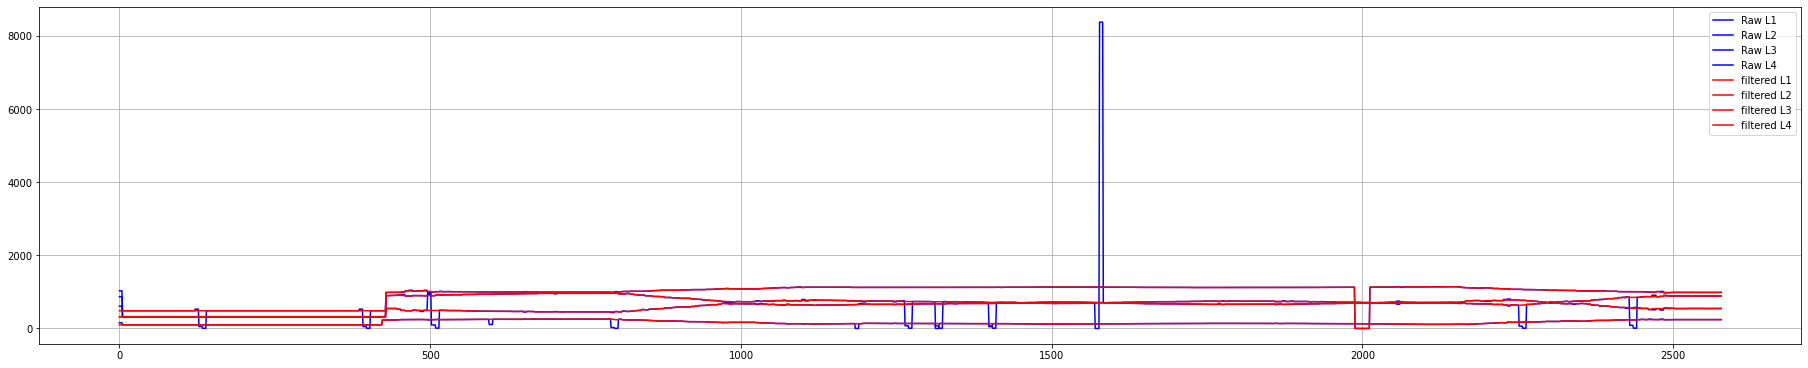

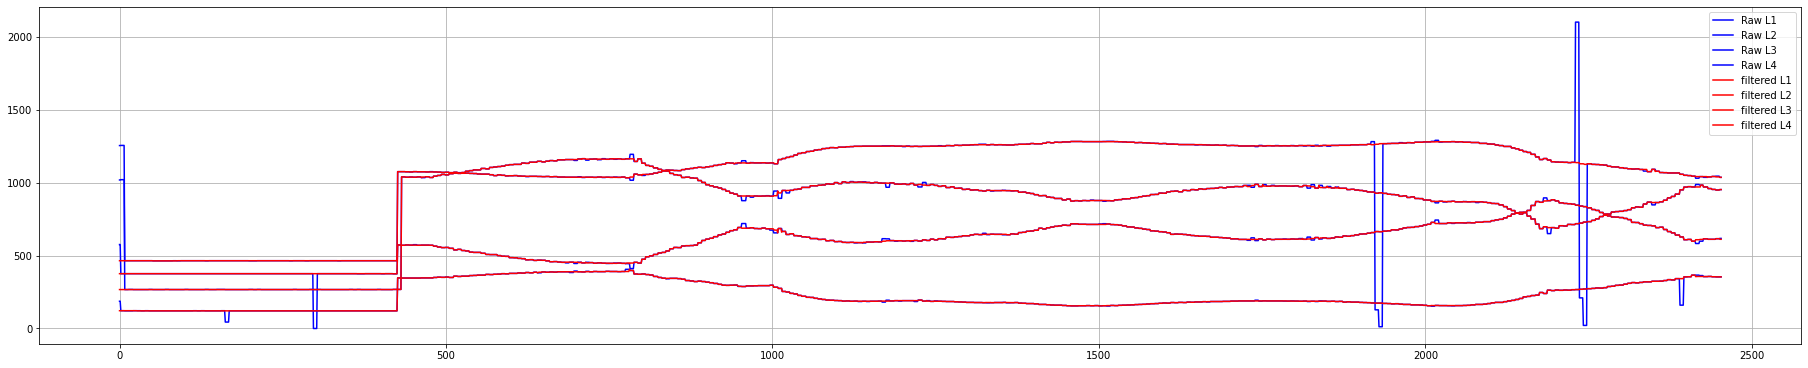

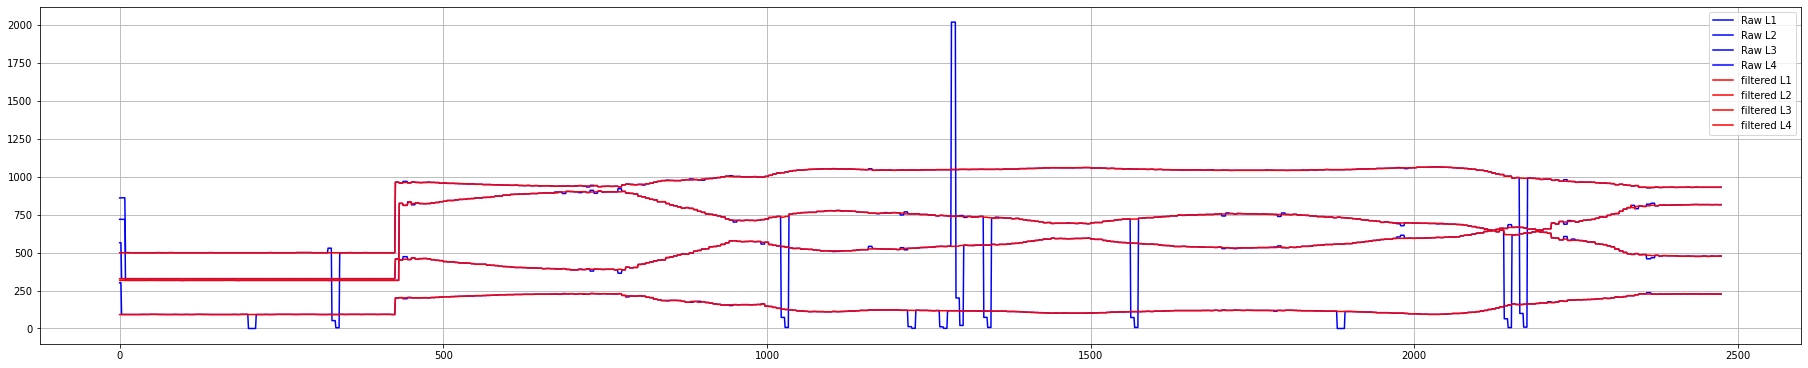

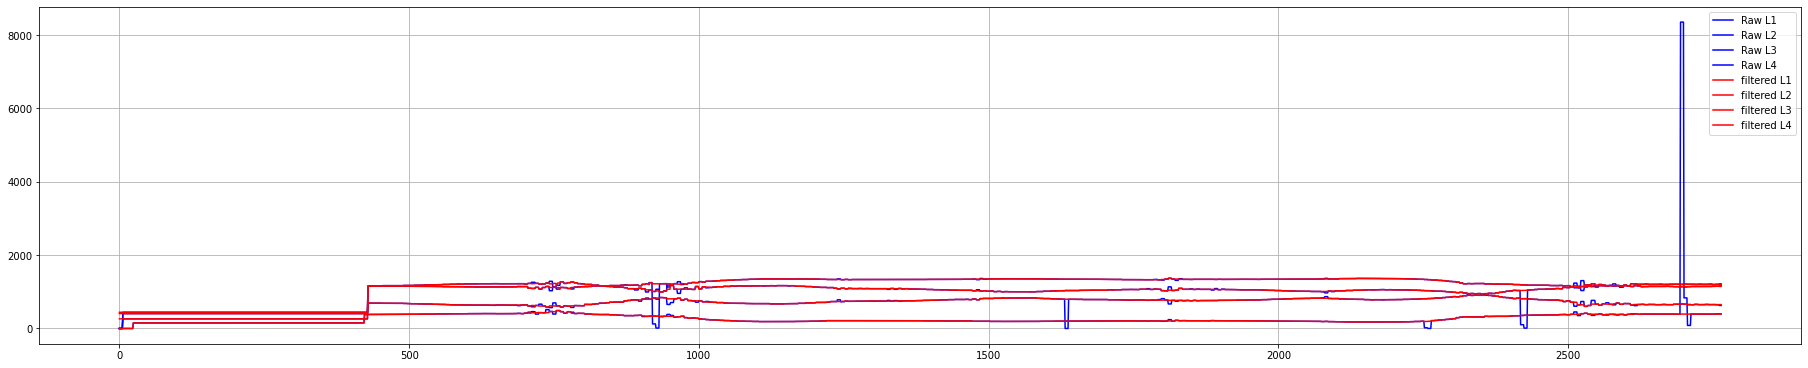

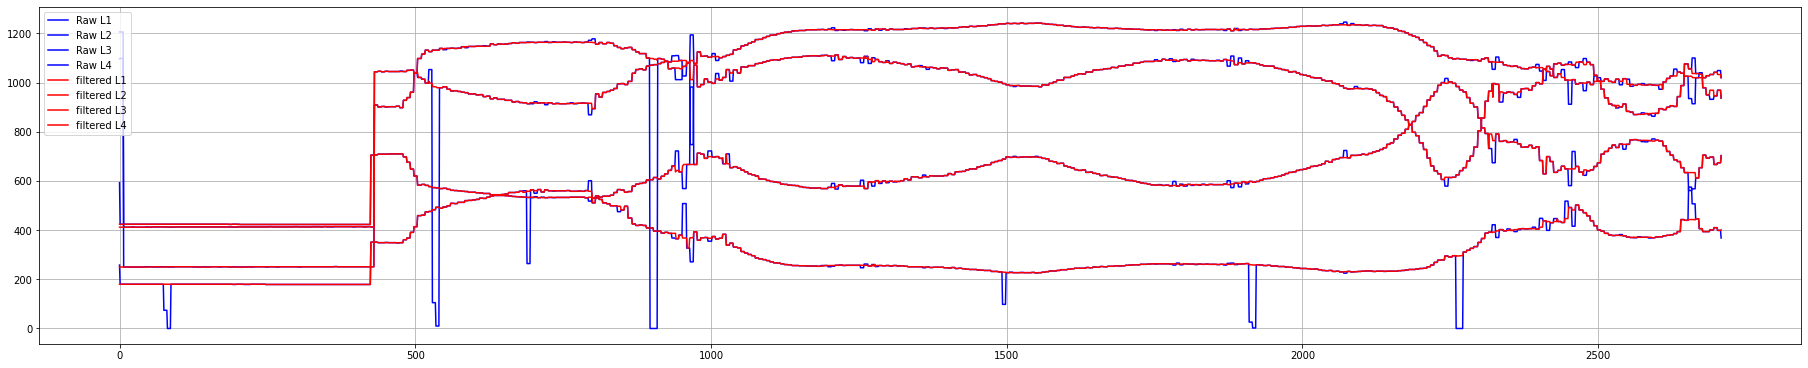

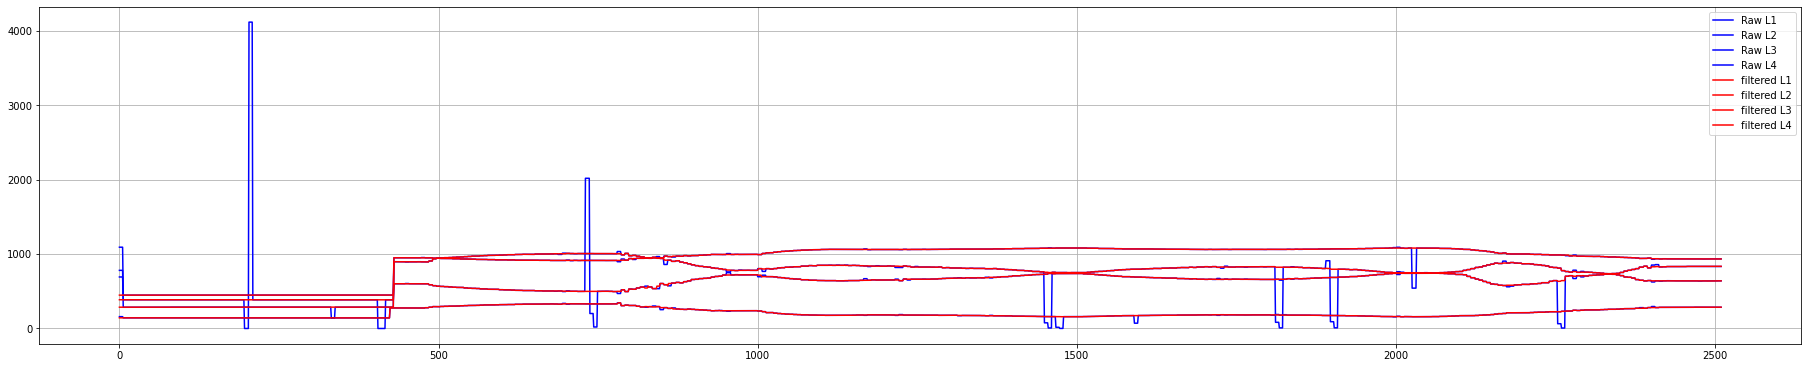

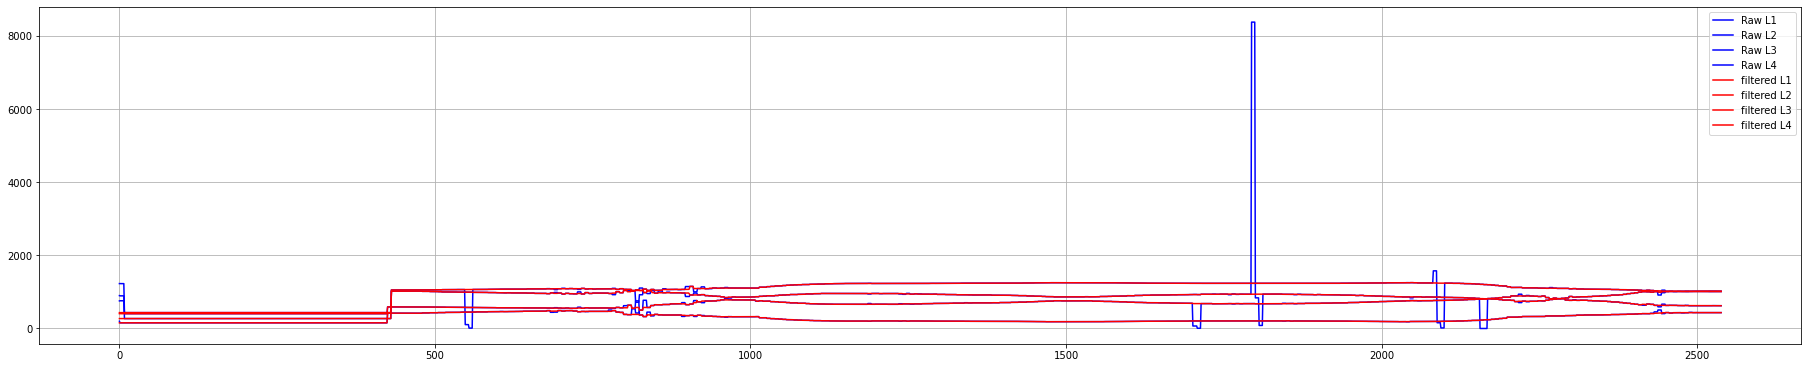

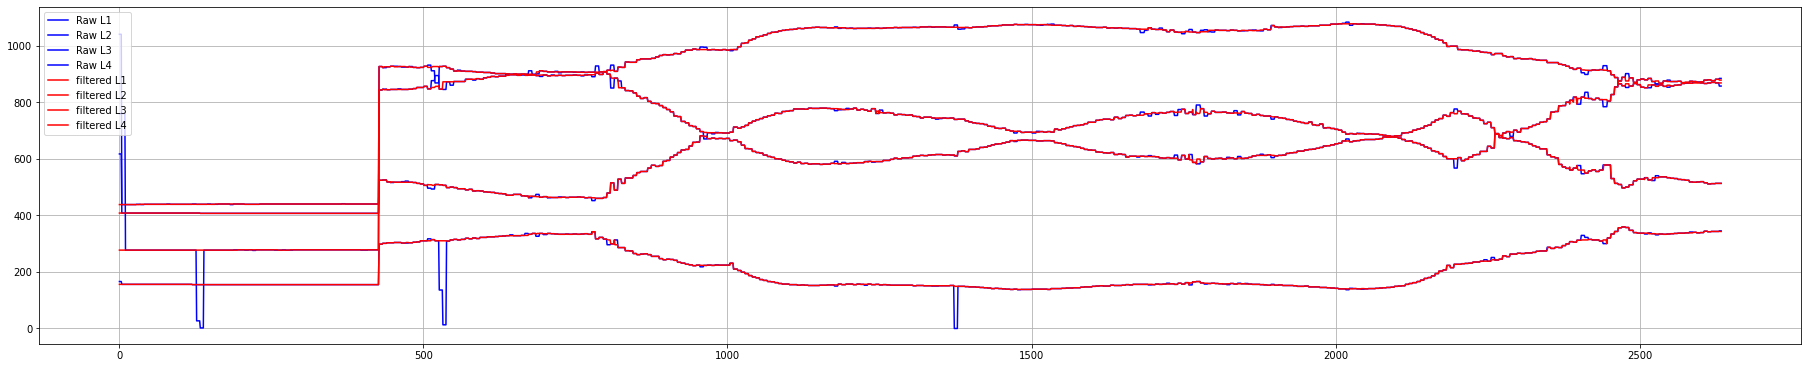

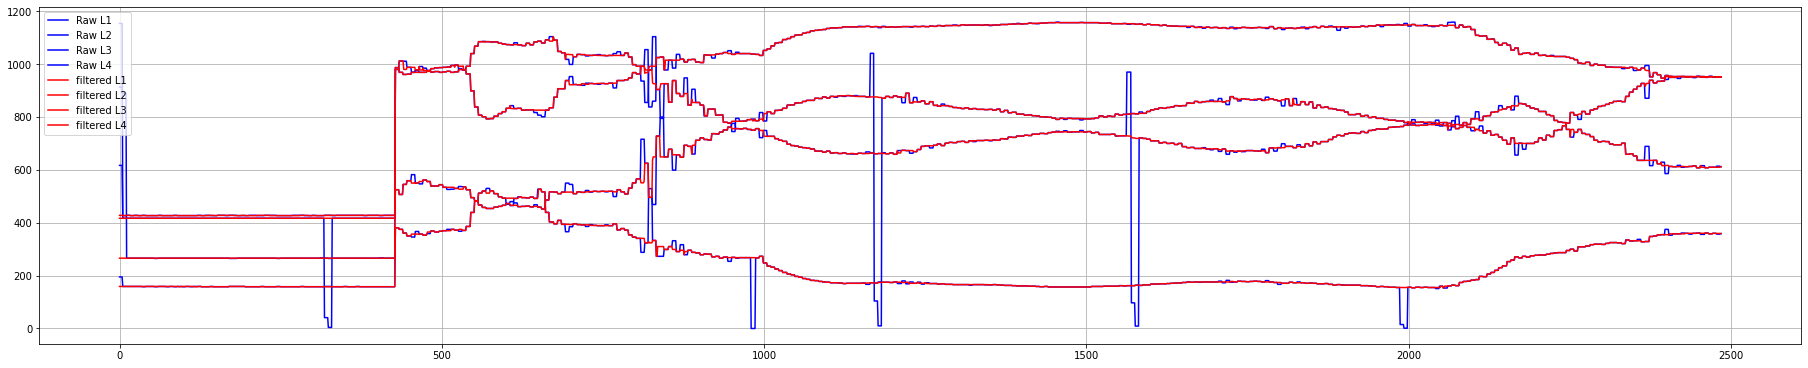

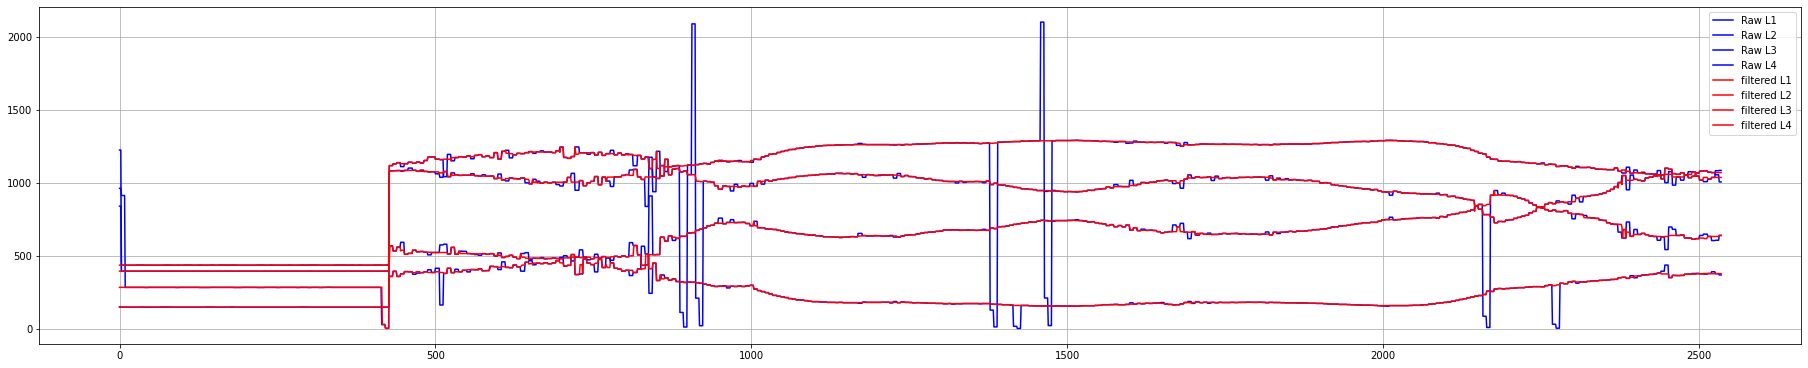

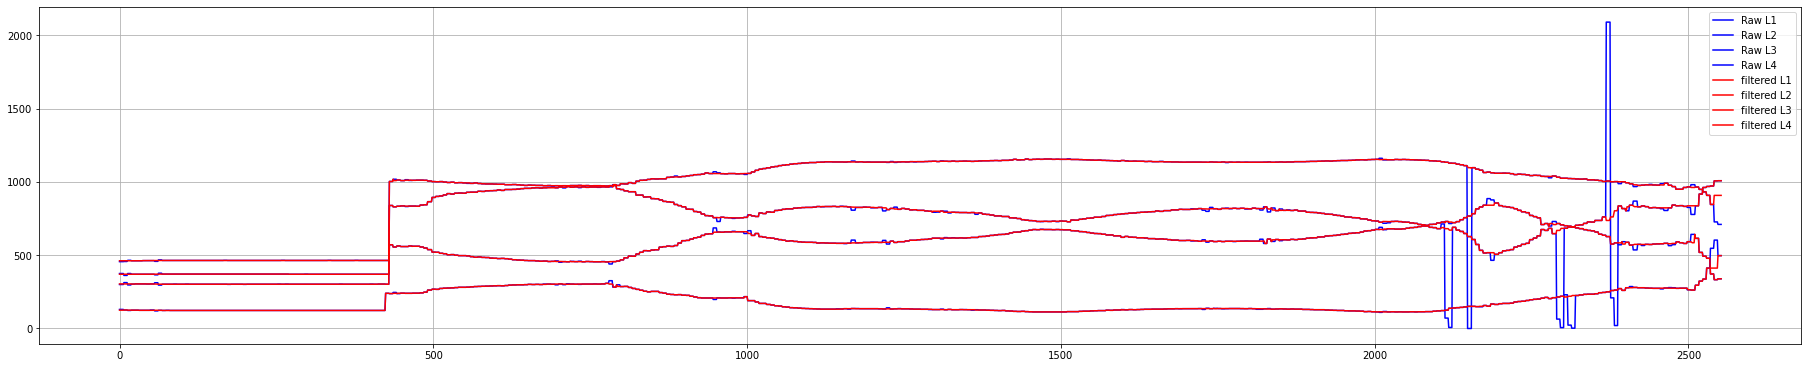

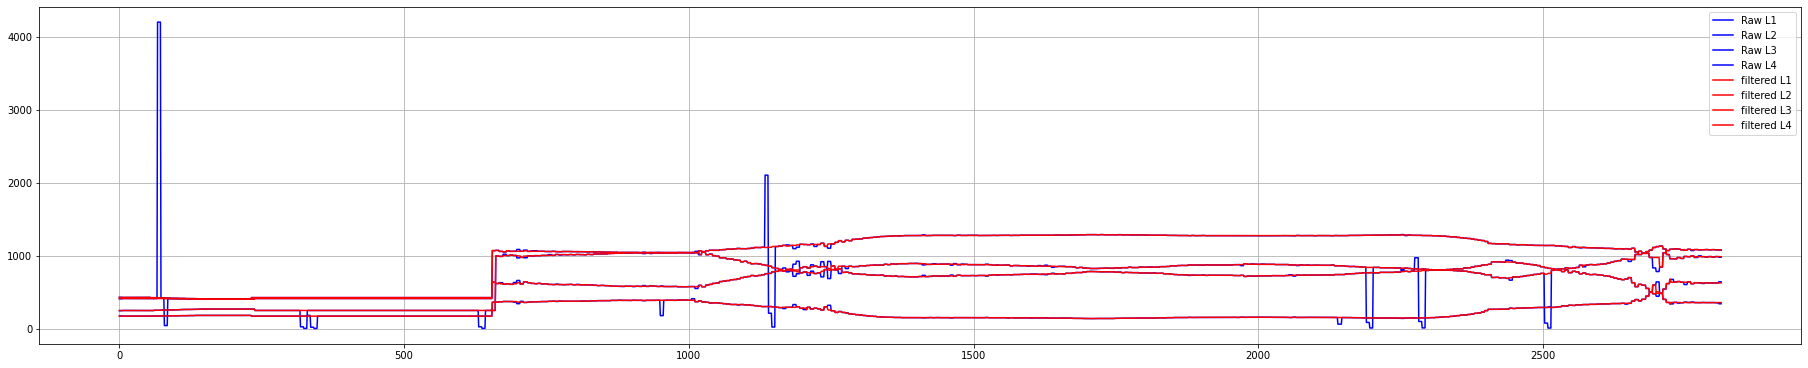

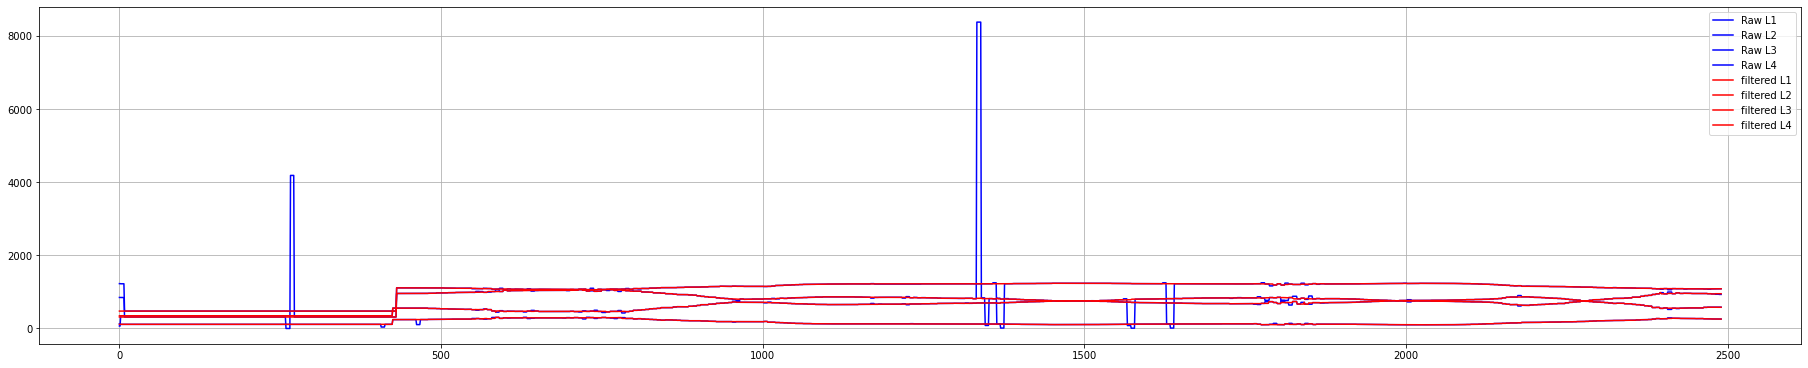

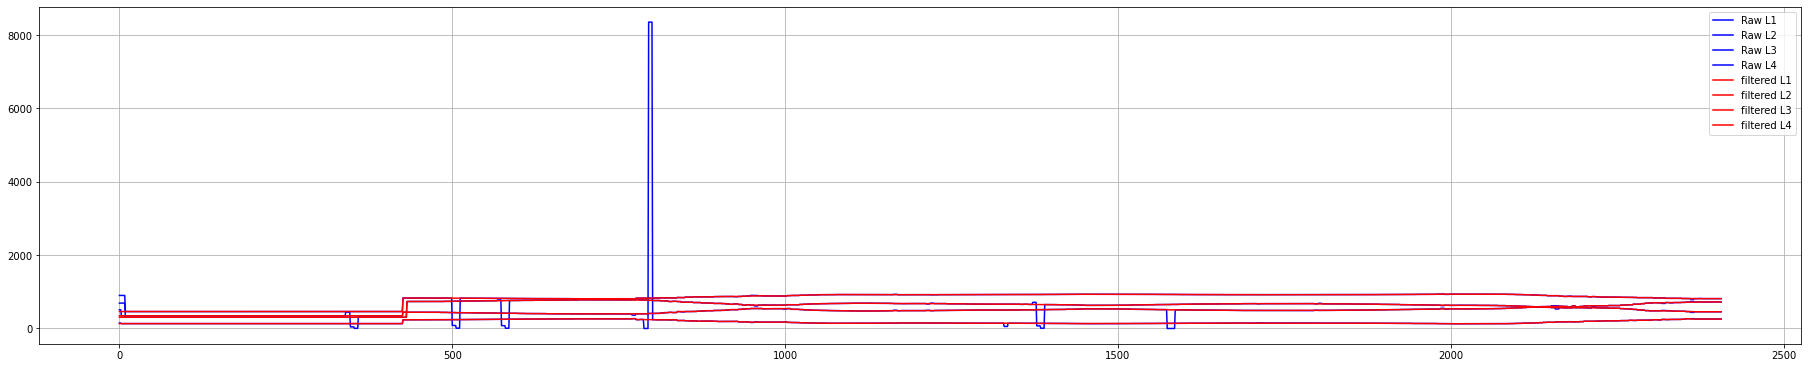

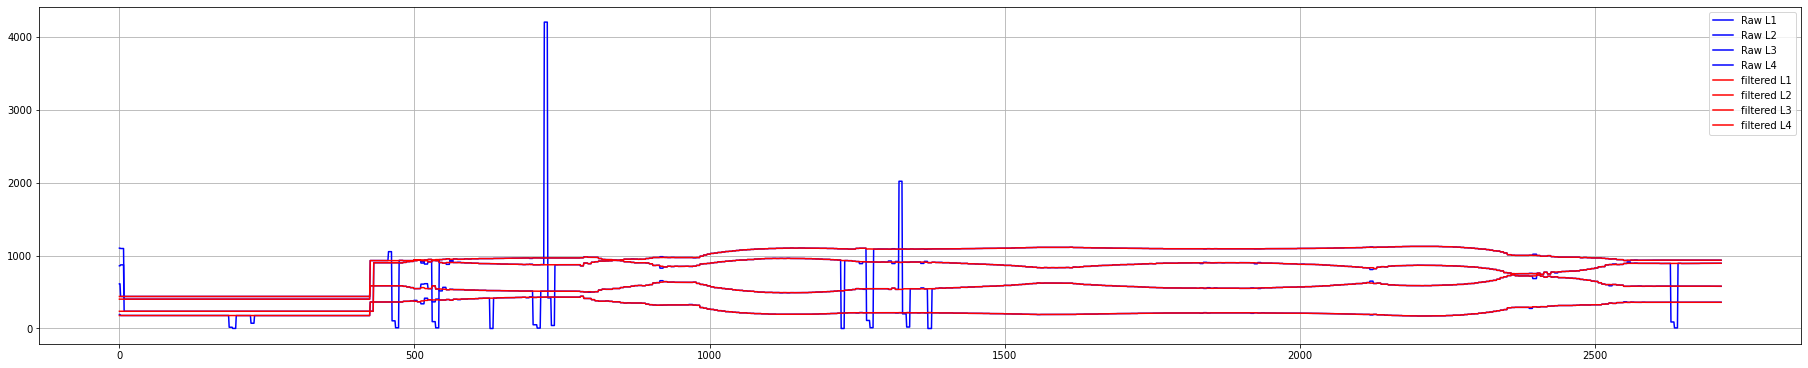

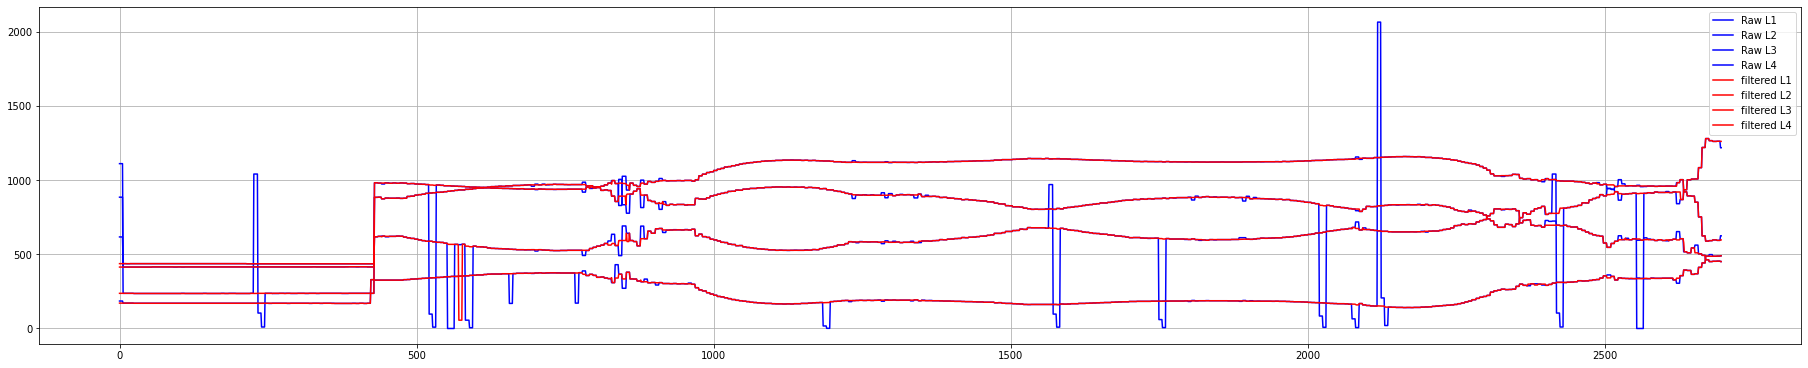

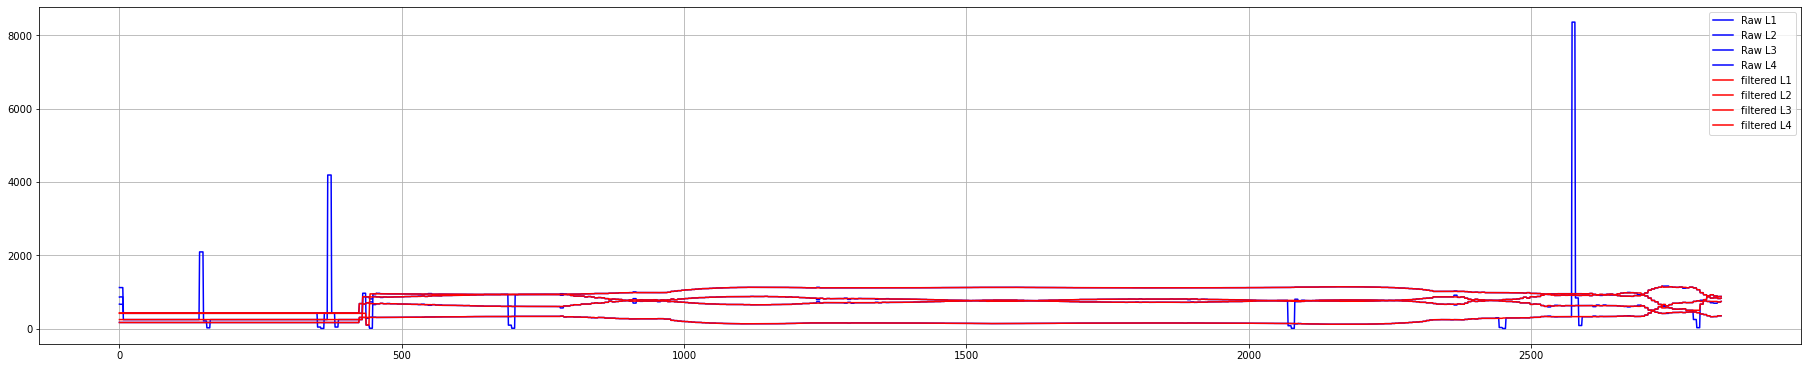

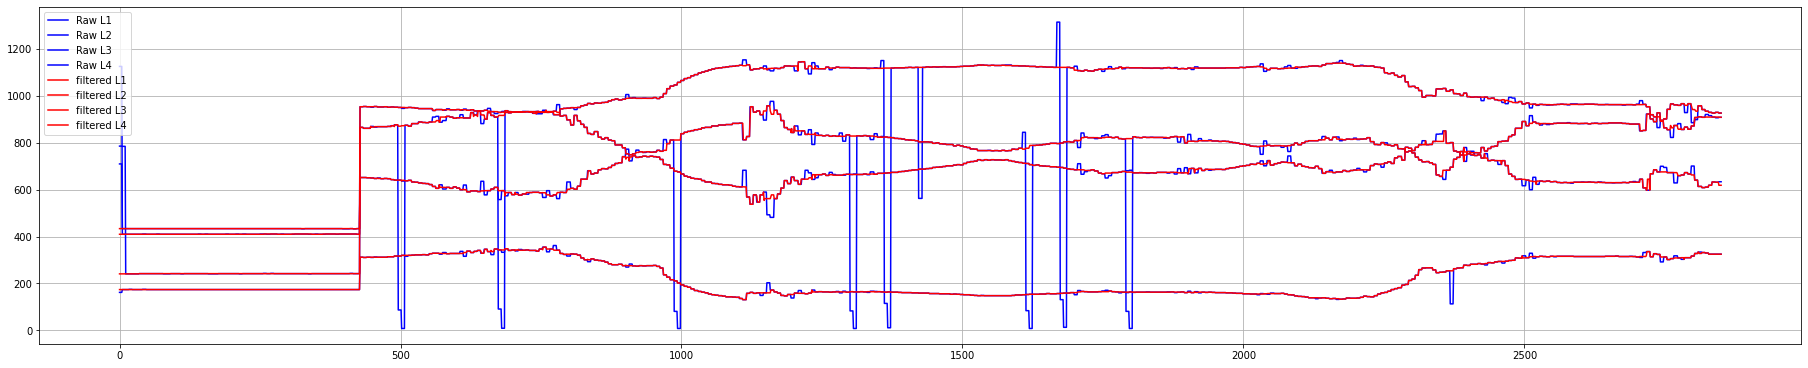

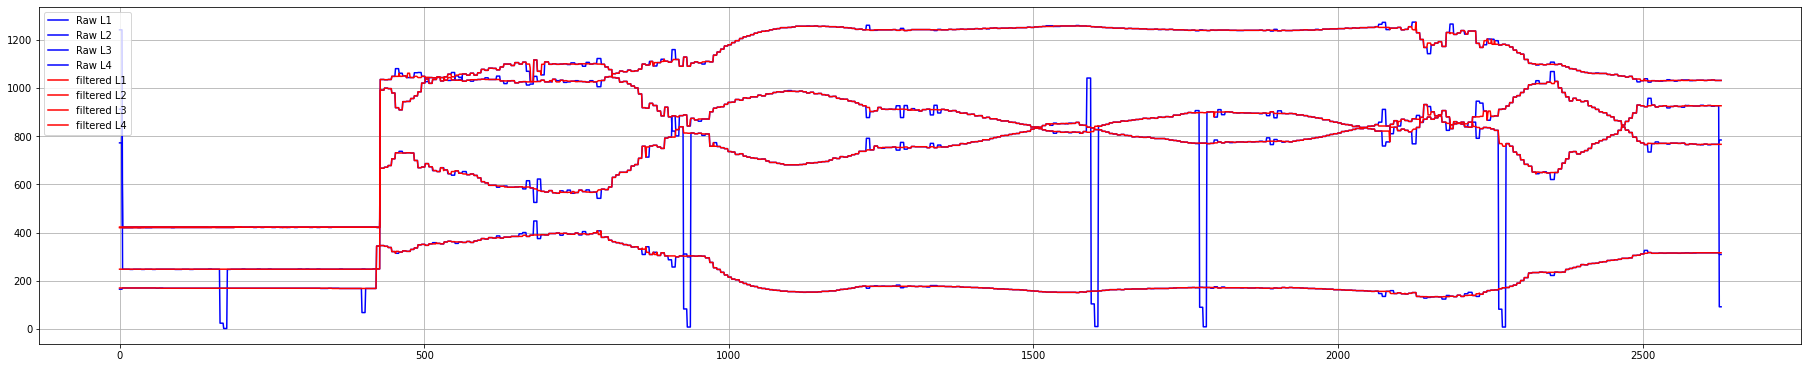

In [70]:
from hampel import hampel

# All Data Preprocessing
#1. Hampel Filtering to compute for Seat Loadcell Data (Seat L1~L4)

for idx in data_config.index:
    seat_loadcell = seat_dataframe[idx].loc[:,["Seat L1", "Seat L2", "Seat L3", "Seat L4"]]

    # raw data
    seat_loadcell_raw = pd.DataFrame()
    seat_loadcell_raw["Seat L1"] = seat_loadcell["Seat L1"]
    seat_loadcell_raw["Seat L2"] = seat_loadcell["Seat L2"]
    seat_loadcell_raw["Seat L3"] = seat_loadcell["Seat L3"]
    seat_loadcell_raw["Seat L4"] = seat_loadcell["Seat L4"]

    '''
    Apply Hampel Filtering
    '''
    seat_loadcell_filtered = pd.DataFrame()
    seat_loadcell_filtered["Seat L1"] = hampel(seat_loadcell_raw["Seat L1"], window_size=HAMPEL_WINDOW_SIZE, n=HAMPEL_THRESHOLD, imputation=HAMPEL_IMPUTATION)
    seat_loadcell_filtered["Seat L2"] = hampel(seat_loadcell_raw["Seat L2"], window_size=HAMPEL_WINDOW_SIZE, n=HAMPEL_THRESHOLD, imputation=HAMPEL_IMPUTATION)
    seat_loadcell_filtered["Seat L3"] = hampel(seat_loadcell_raw["Seat L3"], window_size=HAMPEL_WINDOW_SIZE, n=HAMPEL_THRESHOLD, imputation=HAMPEL_IMPUTATION)
    seat_loadcell_filtered["Seat L4"] = hampel(seat_loadcell_raw["Seat L4"], window_size=HAMPEL_WINDOW_SIZE, n=HAMPEL_THRESHOLD, imputation=HAMPEL_IMPUTATION)

    '''
    Plotting all raw seat loadcell data
    '''
    plt.figure(figsize=(25,5), constrained_layout=True)
    plt.plot(seat_loadcell_raw["Seat L1"], 'b', label='Raw L1')
    plt.plot(seat_loadcell_raw["Seat L2"], 'b', label='Raw L2')
    plt.plot(seat_loadcell_raw["Seat L3"], 'b', label='Raw L3')
    plt.plot(seat_loadcell_raw["Seat L4"], 'b', label='Raw L4')

    # Plotting all filtered seat loadcell data
    plt.plot(seat_loadcell_filtered["Seat L1"], 'r', label='filtered L1')
    plt.plot(seat_loadcell_filtered["Seat L2"], 'r', label='filtered L2')
    plt.plot(seat_loadcell_filtered["Seat L3"], 'r', label='filtered L3')
    plt.plot(seat_loadcell_filtered["Seat L4"], 'r', label='filtered L4')

    plt.legend()
    plt.grid()
    plt.show()

    '''
    Compute Center of Pressure
    '''
    # LPos = {"Seat L1":(455,366), "Seat L2":(455,0), "Seat L3":(0,0), "Seat L4":(0,366)}
    # seat_loadcell_filtered["sum"]=seat_loadcell_filtered.sum(axis=1)

    # COPx = (seat_loadcell_filtered["Seat L1"]*LPos["Seat L1"][0]+seat_loadcell_filtered["Seat L2"]*LPos["Seat L2"][0]+seat_loadcell_filtered["Seat L3"]*LPos["Seat L3"][0]+seat_loadcell_filtered["Seat L4"]*LPos["Seat L4"][0])/seat_loadcell_filtered["sum"]
    # COPy = (seat_loadcell_filtered["Seat L1"]*LPos["Seat L1"][1]+seat_loadcell_filtered["Seat L2"]*LPos["Seat L2"][1]+seat_loadcell_filtered["Seat L3"]*LPos["Seat L3"][1]+seat_loadcell_filtered["Seat L4"]*LPos["Seat L4"][1])/seat_loadcell_filtered["sum"]

    # plt.figure(figsize=(7,5), constrained_layout=True)
    # plt.plot(COPx, COPy, 'b', label='COP')
    # plt.legend()
    # plt.grid()
    # plt.show()
    



<Figure size 576x360 with 0 Axes>

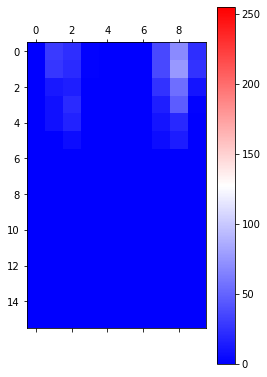

In [157]:
# FSR Matrix data

# for idx in data_config.index:
#     fsr_data = fsr_dataframe[idx].iloc[:,1:161]
#     fsr_data_3d = fsr_data.values.reshape(-1, 16, 10) #convert to 3d

#     plt.figure(figsize=(8,5), constrained_layout=True)
    

#     plt.grid()
#     plt.show()


idx = 1
fsr_data = fsr_dataframe[idx].iloc[:,1:161]
fsr_data_3d = fsr_data.values.reshape(-1, 16, 10) #convert to 3d

plt.figure(figsize=(8,5), constrained_layout=True)
plt.matshow(fsr_data_3d[1110], cmap=plt.get_cmap('bwr'))
plt.clim(0, 255)
plt.colorbar()
plt.show()

In [5]:

# select random 5 user samples for training phase

import random
shuffled_index = np.array(data_config.index)
random.shuffle(shuffled_index)
print(shuffled_index[0:5]) # first 5 index select from shuffled_index


[10  3  4  6 11]


In [35]:
# data preprocessing for training phase
# step 1. leg rest angle conversion (adc value to degree)

for idx in shuffled_index:
    legrest_angle = seat_dataframe[idx].loc[:,"Leg rest Angle"] # extract Leg Rest Angle from seat dataframe
    offset = legrest_angle[0] # define angle offset, because of the sensor rotation direction was inverted
    legrest_angle = np.absolute(legrest_angle-offset) # angle conversion
    seat_dataframe[idx]['Leg rest Angle'] = legrest_angle # column data change


In [ ]:
# model training with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split